In [1]:
import ROOT
import particle as pt
import funx as fx
import numpy as np

filett = ROOT.TFile("./datas/TTDilep.root","OPEN")
tttr = filett.trees.events

fileDY = ROOT.TFile("./datas/DYJets.root","OPEN")
dytr = fileDY.trees.events

file = ROOT.TFile("./datas/Data.root","OPEN")
tr = file.trees.events

Welcome to JupyROOT 6.26/04


In [ ]:
#cut finder solo delle caratteristiche utili alla classificazione
#jets
h_tt_je=ROOT.TH1F("Jet_e", "Jet e", 40, 20 , 200)
h_dy_je=ROOT.TH1F("Jet_e", "Jet e", 40, 20 , 200)
h_tt_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 20 , 150)
h_dy_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 20 , 150)
#met
h_tt_met=ROOT.TH1F("met", "MET pt", 50, 0 , 200)
h_dy_met=ROOT.TH1F("met", "MET pt", 50, 0 , 200)
#muoni
h_m_dy=ROOT.TH1F("two_mu_mass", "mu_mass", 90, 0, 120)
h_m_tt=ROOT.TH1F("two_mu_mass", "mu_mass", 90, 0, 120)

arr = [[h_tt_je,h_dy_je], [h_tt_jpt,h_dy_jpt], [h_tt_met,h_dy_met],[h_m_tt,h_m_dy]]

fx.cut_find_small(tttr,h_tt_met,h_tt_je,h_tt_jpt,h_m_tt)
fx.cut_find_small(dytr,h_dy_met,h_dy_je,h_dy_jpt,h_m_dy)

c=list(np.zeros(4))
h_tts=[]
h_dys=[]
for i in arr:
    h_tts.append(i[0])
    h_dys.append(i[1])
for i in range(4):
    c[i]=ROOT.TCanvas()
    c[i].Draw()
    h_tts[i].Scale(1/h_tts[i].Integral())
    h_dys[i].Scale(1/h_dys[i].Integral())
    h_dys[i].Draw("hist")
    h_tts[i].SetLineColor(ROOT.kRed)
    h_tts[i].Draw("SAME,hist")

In [ ]:
f_dy_jpt = ROOT.TF1("exp", "[0]/[1]*exp(-x/[1])",20,140)
f_tt_jpt = ROOT.TF1("retta", "[0]+[1]*x",20,140)
c1=ROOT.TCanvas()
c1.Draw()
f_dy_jpt.SetParameters(1,4)
h_dy_jpt.Fit(f_dy_jpt,"SR")
h_dy_jpt.Draw()
h_tt_jpt.Draw("SAME")
f_tt_jpt.SetParameters(1,-4)
h_tt_jpt.Fit(f_tt_jpt,"SR")
bb= f_dy_jpt.Integral(45,140) #integrali nel cut >45
ss=f_tt_jpt.Integral(45,140)
bg_eff = bb/(bb+ss) *100
sig_eff = ss/(bb+ss)*100
print("signal efficiency cut:" ,sig_eff)

In [ ]:
f_dy_metpt = ROOT.TF1("gauss","[2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[0])*(x-[0])/(TMath::Sqrt(2)*[1]*[1]))",0,200)
f_tt_metpt = ROOT.TF1("gauss","[2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[0])*(x-[0])/(TMath::Sqrt(2)*[1]*[1]))",0,200)
c2=ROOT.TCanvas()
c2.Draw()
f_dy_metpt.SetParameters(8,100,0.1)
h_dy_met.Fit(f_dy_metpt,"SR")
h_dy_met.Draw()
h_tt_met.Draw("SAME")
f_tt_metpt.SetParameters(50,3000,1)
h_tt_met.Fit(f_tt_metpt,"SR")
bb= f_dy_metpt.Integral(35,140) #integrali nel cut >35
ss=f_tt_metpt.Integral(35,140)
bg_eff = bb/(bb+ss) *100
sig_eff = ss/(bb+ss)*100
print("signal efficiency cut:" ,sig_eff)

In [ ]:
f_dy_je = ROOT.TF1("gauss","[2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[0])*(x-[0])/(TMath::Sqrt(2)*[1]*[1]))",0,200)
f_tt_je = ROOT.TF1("gauss","[2]*1/([1]*TMath::Sqrt(2*TMath::Pi()))*exp(-(x-[0])*(x-[0])/(TMath::Sqrt(2)*[1]*[1]))",0,200)
c3=ROOT.TCanvas()
c3.Draw()
f_dy_je.SetParameters(8,100,0.1)
h_dy_je.Fit(f_dy_je,"SR")
h_dy_je.Draw()
h_tt_je.Draw("SAME")
f_tt_je.SetParameters(50,3000,1)
h_tt_je.Fit(f_tt_je,"SR")
bb= f_dy_je.Integral(50,250) #integrali nel cut >60
ss=f_tt_je.Integral(50,250)
bg_eff = bb/(bb+ss) *100
sig_eff = ss/(bb+ss)*100
print("signal efficiency cut:" ,sig_eff)

# Start cutting

n_jets= 418.0
n_mets= 209.0
n_events= 209
n_events_norm= 5.0671856


Warning in <TFile::Append>: Replacing existing TH1: Jet_e (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: met (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: two_mu_mass (Potential memory leak).


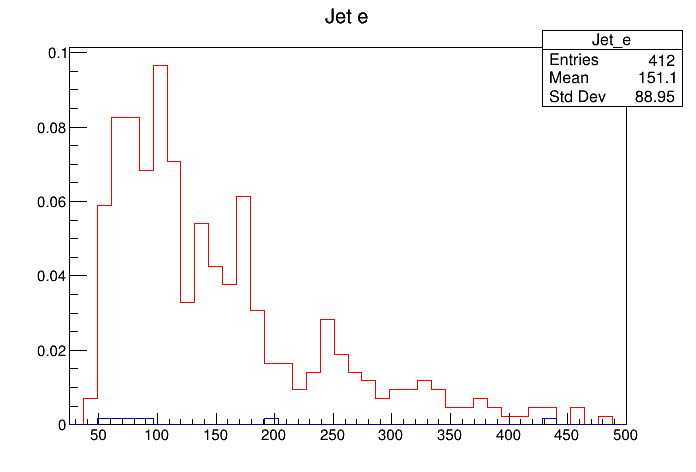

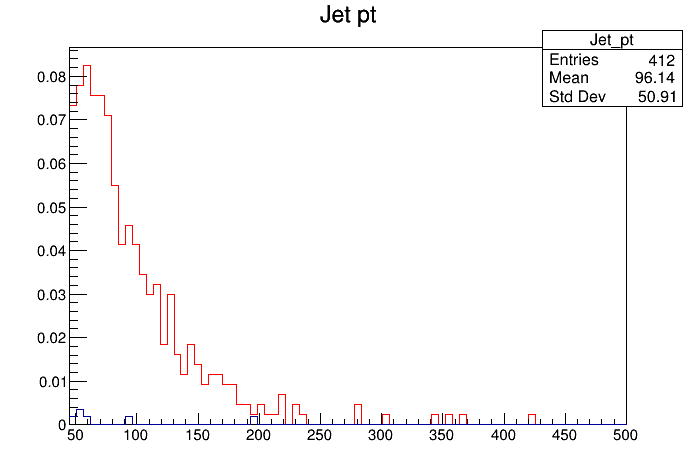

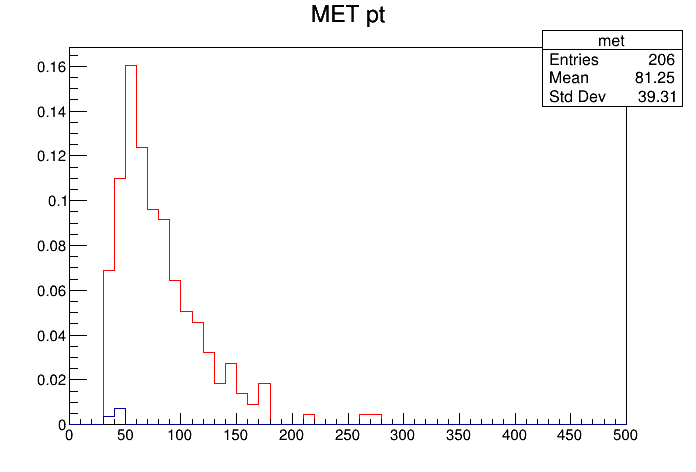

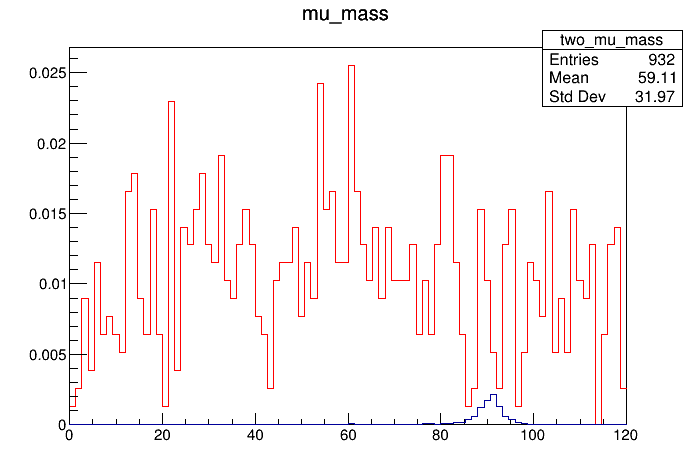

In [2]:
#jets
h_tt_je=ROOT.TH1F("Jet_e", "Jet e", 40, 25 , 500)
h_dy_je=ROOT.TH1F("Jet_e", "Jet e", 40, 25 , 500)
h_tt_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 45 , 500)
h_dy_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 45 , 500)
#met
h_tt_met=ROOT.TH1F("met", "MET pt", 50, 0 , 500)
h_dy_met=ROOT.TH1F("met", "MET pt", 50, 0 , 500)
#muoni
h_m_dy=ROOT.TH1F("two_mu_mass", "mu_mass", 90, 0, 120)
h_m_tt=ROOT.TH1F("two_mu_mass", "mu_mass", 90, 0, 120)

arr = [[h_tt_je,h_dy_je], [h_tt_jpt,h_dy_jpt], [h_tt_met,h_dy_met],[h_m_tt,h_m_dy]]

h_tt_met,h_tt_je,h_tt_jpt,h_m_tt,n_jet_tt,n_met_tt, n_events_tt = fx.cut_make(tttr,h_tt_met,h_tt_je,h_tt_jpt,h_m_tt)
h_dy_met,h_dy_je,h_dy_jpt,h_m_dy,n_jet_dy, n_met_dy, n_events_dy= fx.cut_make(dytr,h_dy_met,h_dy_je,h_dy_jpt,h_m_dy)

print("n_jets=", n_jet_tt+n_jet_dy)
print("n_mets=", n_met_tt+n_met_dy)
print("n_events=", n_events_tt+n_events_dy)

w_dy=fx.n4("dy")
w_tt=fx.n4("tt")

print("n_events_norm=", n_events_tt*w_tt+n_events_dy*w_dy)

c=list(np.zeros(4))
h_tts=[]
h_dys=[]
for i in arr:
    h_tts.append(i[0])
    h_dys.append(i[1])
for i in range(4):
    c[i]=ROOT.TCanvas()
    c[i].Draw()
    h_tts[i].Scale(1/h_tts[i].Integral())
    h_dys[i].Scale(1/h_dys[i].Integral())
    
    h_tts[i].Scale(w_dy)
    h_dys[i].Scale(w_tt)
    
    
    h_tts[i].SetLineColor(ROOT.kRed)
    h_tts[i].Draw("hist")
    h_dys[i].Draw("SAME,hist")

n_jets= 16.0
n_mets= 8.0
n_events= 8 +/- 2.8284271247461903


Warning in <TFile::Append>: Replacing existing TH1: Jet_e (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Jet_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: met (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: two_mu_mass (Potential memory leak).


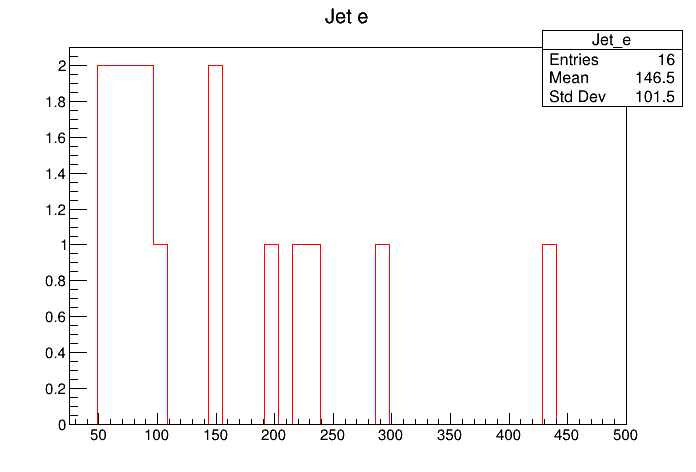

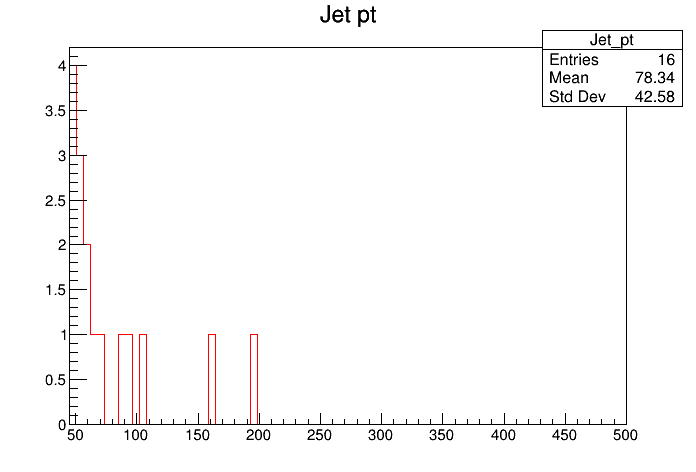

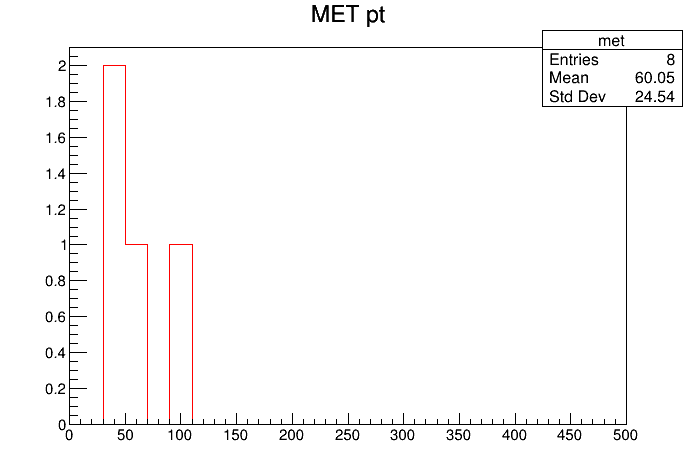

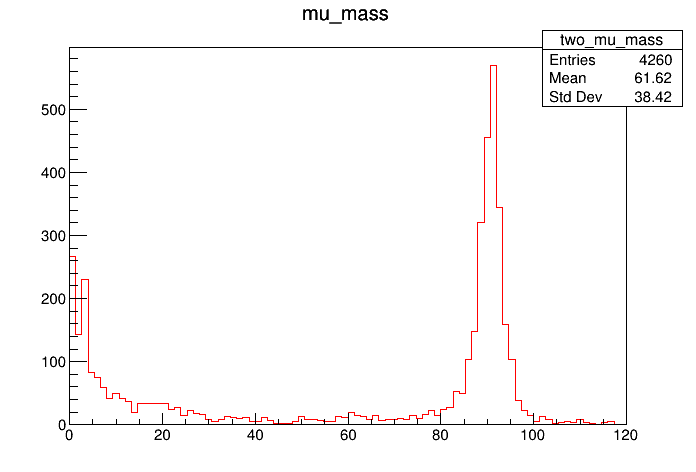

In [9]:
#jets
h_je=ROOT.TH1F("Jet_e", "Jet e", 40, 25 , 500)
h_jpt=ROOT.TH1F("Jet_pt", "Jet pt", 80, 45 , 500)
#met
h_met=ROOT.TH1F("met", "MET pt", 50, 0 , 500)
#muoni
h_m=ROOT.TH1F("two_mu_mass", "mu_mass", 90, 0, 120)

arr = [h_je,h_jpt,h_met,h_m]

h_met,h_je,h_jpt,h_m,n_jet,n_met, n_events = fx.cut_make(tr,h_met,h_je,h_jpt,h_m)

print("n_jets=", n_jet)
print("n_mets=", n_met)
print("n_events=", n_events, "+/-", np.sqrt(n_events))

c=list(np.zeros(4))
histos=[]

for i in arr:
    histos.append(i)
for i in range(4):
    c[i]=ROOT.TCanvas()
    c[i].Draw()
    #histos[i].Scale(1/histos[i].Integral())
    histos[i].SetLineColor(ROOT.kRed)
    histos[i].Draw("hist")

In [6]:
np.sqrt(8)

2.8284271247461903

273120